In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pprint import pprint
plt.rcParams.update({'font.size': 20, 'figure.figsize': (6, 6)})


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/MLlingo/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Ticket','Name', 'Cabin'], axis=1, inplace=True)

### Basic Visualization

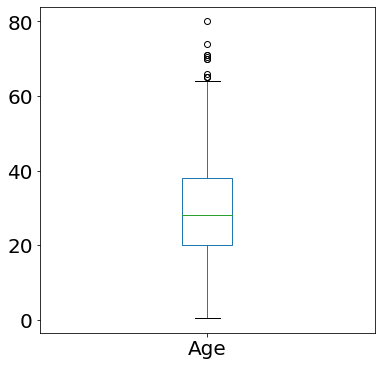

In [4]:
df['Age'].plot(kind='box')

# # REMOVING OUTLIER USING BOX PLOT
# Q1 = df['AVG'].quantile(0.25)
# Q3 = df['AVG'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (df['AVG'] >= Q1 - 1.5 * IQR) & (df['AVG'] <= Q3 + 1.5 *IQR)
# df.loc[filter]  

### Basic data details

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Feature Engineering

In [9]:
# Analyzstion
print("Sibling 0.68 qunatile : " + str(df['SibSp'].quantile(0.68)) +
      " Sibling 0.7 quntile " + str(df['SibSp'].quantile(0.7)))
print("Shows around 70% people were travleing with any sibling")

Sibling 0.68 qunatile : 0.0 Sibling 0.7 quntile 1.0
Shows around 70% people were travleing with any sibling


In [10]:
# Analyzation using plot
# df['SibSp'].plot(kind='kde')

In [11]:
df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
# Ananlyze correllation between family/survived and isAlone/survuved
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
3,"(48.168, 64.084]",0.434783
2,"(32.252, 48.168]",0.404255
1,"(16.336, 32.252]",0.369942
4,"(64.084, 80.0]",0.090909


In [16]:
df[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().reset_index().corr()

,index,Survived
index,1.000000,-0.793465
Survived,-0.793465,1.000000


In [17]:
df['FareBand'] = pd.cut(df['Fare'], 5)
df[['FareBand', 'Survived']].groupby('FareBand', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareBand,Survived
4,"(409.863, 512.329]",1.000000
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
0,"(-0.512, 102.466]",0.361575
3,"(307.398, 409.863]",NaN


In [18]:
df['family'] = df['SibSp'] + df['Parch']
df[['family', 'Survived']].groupby('family', as_index=False).mean().corr()

,family,Survived
family,1.000000,-0.700327
Survived,-0.700327,1.000000


In [19]:
df[['family', 'Survived']].groupby('family', as_index=False).mean().sort_values(by='Survived', ascending=False)

,family,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [20]:
df['alone'] = (df['family'] == 0)
df[['alone', 'Survived']].groupby('alone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,alone,Survived
0,False,0.505650
1,True,0.303538


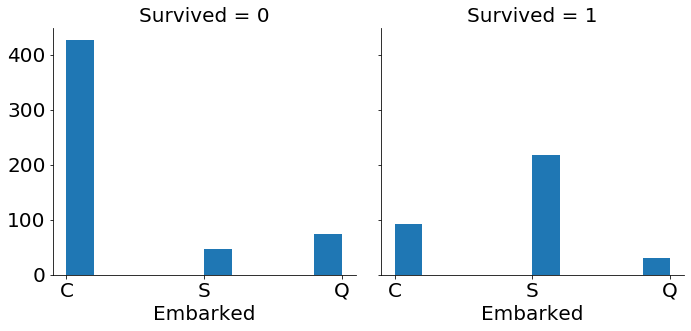

In [21]:
grid = sns.FacetGrid(df, col='Survived', height=5)
grid.map(plt.hist, 'Embarked')

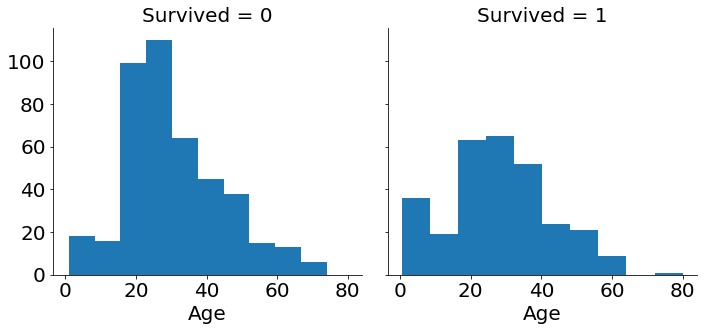

In [22]:
grid = sns.FacetGrid(df, col='Survived', height=5)
grid.map(plt.hist, 'Age')
grid.add_legend();

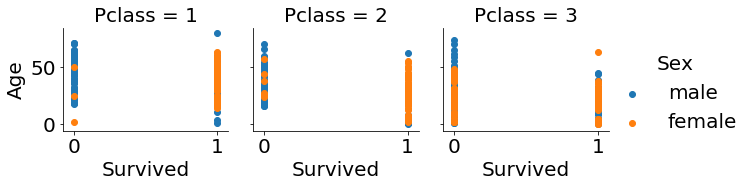

In [23]:
g = sns.FacetGrid(df, col='Pclass', hue='Sex')
g.map(plt.scatter, 'Survived', 'Age')
g.add_legend()

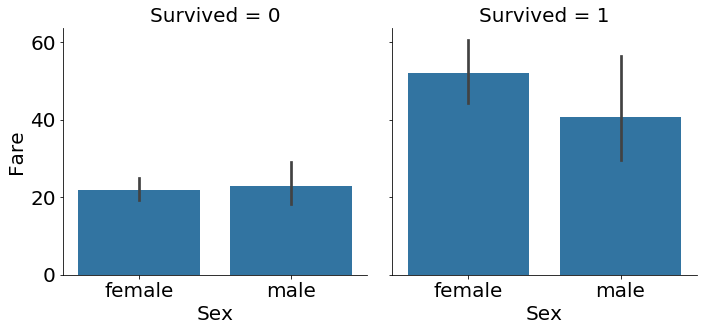

In [24]:
g = sns.FacetGrid(df, col='Survived', size = 5)
g.map(sns.barplot, 'Sex', 'Fare')
g.add_legend()

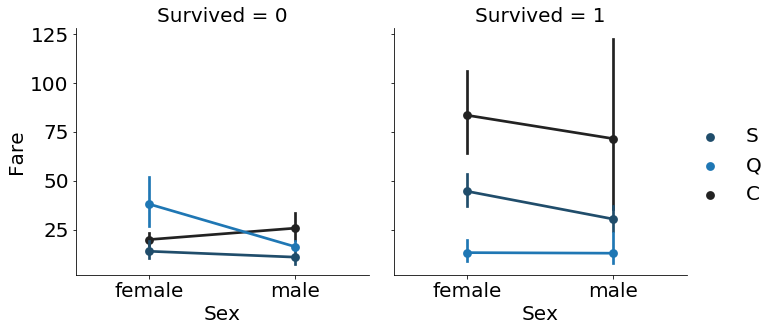

In [25]:
g = sns.FacetGrid(df, col='Survived', size = 5)
g.map(sns.pointplot, 'Sex', 'Fare', 'Embarked')
g.add_legend()

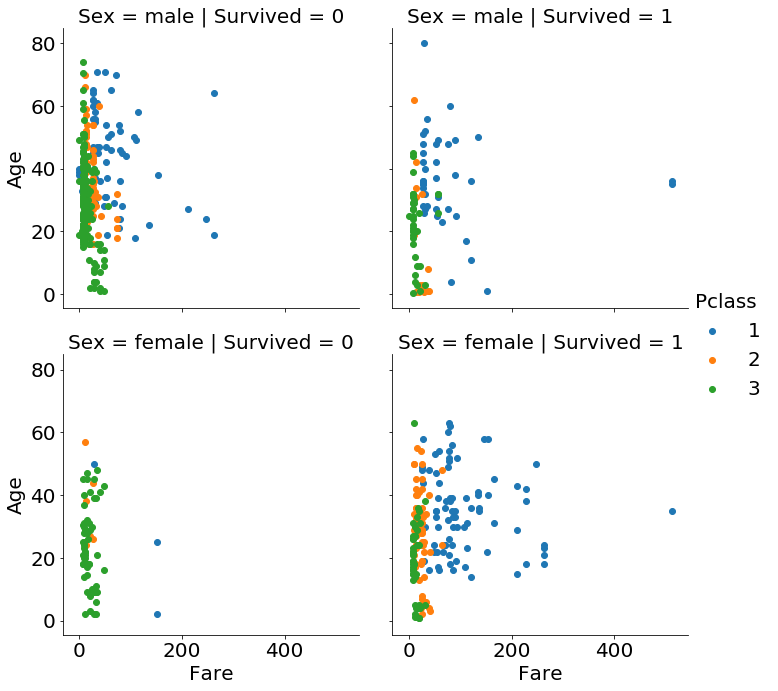

In [26]:
# No conclusion from here
g = sns.FacetGrid(df, col='Survived', row='Sex', hue = 'Pclass', size = 5)
g.map(plt.scatter, 'Fare', 'Age')
g.add_legend()

### Sklearn

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, LabelBinarizer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
import sklearn
sklearn.__version__

'0.22.1'

In [42]:
#Custom Transformer that extracts columns passed as argument to its constructor 
class BandsTransformer( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__( self, _bins=5):
        self._bins = _bins 
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform(self, X, y = None ):
        X = pd.DataFrame(X)
        _labels = list(range(1, self._bins+1))
        bands = pd.cut(X.iloc[:,0], bins=self._bins, labels = _labels).to_frame()
        return bands
    
#Custom Transformer that extracts columns passed as argument to its constructor 
class FamilyAloneTransformer( BaseEstimator, TransformerMixin ):
    #Class Constructor 
    def __init__(self):
        super().__init__()
    
    #Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    #Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        X['family'] = X['SibSp'] + X['Parch'] 
        X['alone'] = X['family'] == 0
        return X[['alone']].values

#### Column Transformation

In [43]:
df = pd.read_csv('data/titanic/train.csv')
train_col = df.columns.to_list()
train_col.remove('Survived')
X = df[train_col]
y = df['Survived']

cat_columns = ['Pclass', 'Sex', 'Embarked']
age_column = ['Age']
fare_column = ['Fare']
family_column = ['SibSp', 'Parch']

# num_transofrmer = Pipeline(
#     steps=[('imputer' , SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler())]
# )

# cat_transformer = Pipeline(
#     steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder())]
# )

age_transformer = Pipeline(steps=[('imputer' , SimpleImputer(strategy='median')), ('bands', BandsTransformer())])
fare_transformer = Pipeline(steps=[('imputer' , SimpleImputer(strategy='median')), ('bands', BandsTransformer())])
family_alone_transfromer = FamilyAloneTransformer()
cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(drop='first'))]
)

col_transformer = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_columns),
        ('age', age_transformer, age_column),
        ('fare', fare_transformer, fare_column),
        ('family_alone', family_alone_transfromer, family_column)
    ]
)
X = col_transformer.fit_transform(X)

In [44]:
pd.DataFrame(X, dtype=np.int).describe()

,0,1,2,3,4,5,6,7
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.206510,0.551066,0.647587,0.086420,0.725028,2.290685,1.088664,0.602694
std,0.405028,0.497665,0.477990,0.281141,0.446751,0.812620,0.399431,0.489615
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000


#### Trying out models directly

In [45]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree


83.84

In [46]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
print(acc_random_forest)

83.84


In [47]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

82.83

#### Hyperparameter Tuning

In [48]:
classifier_dict = {
    #'SVM' : SVC(),
    # 'neural_network': MLPClassifier(),
     'rand_forest': RandomForestClassifier(),
     'adaboost' : AdaBoostClassifier(),
     'knn': KNeighborsClassifier()
}

hyperparameter_dict = {
    'SVM' : {
        'kernel': ['rbf'], 'C': [1, 100], 'gamma' : ['scale']
    },
    'neural_network': {
        'hidden_layer_sizes' : [50, 100, 150], 'learning_rate_init': [0.001], 
        'solver' : ['sgd', 'adam'], 'max_iter' : [1000]
    },
    'rand_forest': {
        'n_estimators' : [50, 100, 200]
    },
    'adaboost' : {
        'n_estimators' : [200]
    },
    'knn': {
        'n_neighbors' : [3, 5, 10], 'weights' : ['uniform', 'distance']
    }
}

cls_cv_scores = {}
for cls_name, cls in classifier_dict.items():
    print("Processing: " + str(cls_name))
    cv = GridSearchCV(cls, param_grid= hyperparameter_dict[cls_name], scoring='accuracy', cv=5)
    cv.fit(X,y)
    print("Best score: " + str(cv.best_score_))
    print("-"*50)
    cls_cv_scores[cls_name] = (cv.best_estimator_, cv.best_score_)
    # cv_best_score_manually = np.mean(cross_val_score(cv.best_estimator_, X, y, cv=5, scoring='accuracy'))

Processing: rand_forest
Best score: 0.8024919967359236
--------------------------------------------------
Processing: adaboost
Best score: 0.785638064151654
--------------------------------------------------
Processing: knn
Best score: 0.7991023790094783
--------------------------------------------------


In [49]:
pprint(cls_cv_scores)

{'adaboost': (AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None),
              0.785638064151654),
 'knn': (KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'),
         0.7991023790094783),
 'rand_forest': (RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
                 0.802

#### Submission

In [50]:
model = Pipeline(
    steps=[('transformer', col_transformer) , ('cls', cls_cv_scores['rand_forest'][0])]
)

In [51]:
test_df = pd.read_csv('data/titanic/test.csv')
test_df['Survived'] = model.predict(test_df)
#test_df.columns = [col.lower() for col in test_df]
#test_df.rename(columns={'passengerid' : 'PassengerId'}, inplace=True)

In [52]:
test_df.to_csv('data/titanic/predict.csv', index=False, columns=['PassengerId', 'Survived'])